In [1]:
import pandas as pd
import regex as re

In [2]:
with open("C:\\Users\\20812018100700\\working\\work\\rd_part\\result3.4.txt", encoding='utf-8')as f:
    result = f.read()

result = re.split("done [0-9$,.%]+\d*\n", result)

In [3]:
for i in range(len(result)):
    result[i] = result[i].replace("Overall", "\nOverall")


In [4]:
df = pd.read_csv("C:\\Users\\20812018100700\\working\\work\\rd_part\\test2_data.csv")
df = df[df["message"].notnull()]
df.reset_index(drop=True, inplace=True)
df = df.iloc[:len(result), :]

In [5]:
sentment = []
for i in range(len(result)):
    m = re.search('(?<=Document Sentiment: )(.*)', result[i])
    sentment.append(m.groups()[0])

In [34]:
df["sentment"] = pd.Series(sentment)
df.sample(10)

,created_time,message,id,from,sentment
89,2021-07-27T20:55:56+0000,Hadeer Morgan,1879075422254116_1880825085412483,NaN,neutral
112,2021-07-24T22:39:10+0000,هبه ايمن,1874797362681922_1878375955657396,NaN,neutral
81,2021-07-28T07:42:51+0000,بكام الكورس بعد اذنك وكيفيه الحجز,1880729578755367_1881163275378664,NaN,neutral
123,2021-07-28T15:09:00+0000,ممكن تفاصيل الكورس ده في مجالات ايه,1874321589396166_1881493035345688,NaN,neutral
38,2021-08-13T12:16:59+0000,Koki Khallaf,1894442890717369_1894999563995035,NaN,neutral
156,2021-07-27T23:26:07+0000,OM Yadr,1871826116312380_1880898765405115,NaN,neutral
15,2021-08-23T00:20:03+0000,ازاي اعالج الديفوهات,1902281406600184_1902625193232472,NaN,neutral
207,2021-07-22T11:50:59+0000,Cosmetics formulation??,1871826116312380_1876385725856419,NaN,neutral
105,2021-07-24T22:49:40+0000,بكام,1876328005862191_1878383322323326,NaN,neutral
153,2021-07-18T08:24:22+0000,Nova Hassan,1871826116312380_1873214689506856,NaN,neutral


In [7]:
df["sentment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [8]:
di = {
      "positive":[], 
      "neutral":[],
      "negative":[]
      }

In [9]:
result[-1]

'كورس الرايك لمحمد كيلاني \nDocument Sentiment: neutral\n\n\nOverall scores: positive=0.39; neutral=0.55; negative=0.06 \n\n'

In [10]:
for i in range(len(result)):

    h = str(re.search('(?<=Overall scores: )(.*)', result[i]).groups()[0]).split("; ")
    for j in h:
        s = j.split("=")
        di[s[0]].append(s[1])

In [11]:
present = pd.DataFrame(di)
present.head()

,positive,neutral,negative
0,0.05,0.92,0.03
1,0.01,0.98,0.01
2,0.57,0.39,0.04
3,1.00,0.00,0.00
4,0.01,0.98,0.01


In [12]:
ndf = pd.merge(df, present, left_index=True, right_index=True)

In [17]:
ndf.sample(10)

,created_time,message,id,from,sentment,positive,neutral,negative
130,2021-07-27,كيفية الاشتراك,1873539362807722_1880203472141311,NaN,neutral,0.04,0.94,0.02
50,2021-08-05,كيف الدفع يتم بدون بطاقه ائتمان,1888087728019552_1888266024668389,NaN,neutral,0.03,0.92,0.05
118,2021-07-23,رائع,1874321589396166_1877172685777723,NaN,positive,1.00,0.00,0.00
94,2021-07-23,جمييل,1876622589166066_1877172205777771,NaN,positive,1.00,0.00,0.00
138,2021-07-20,انا دخلت وحجزت كورس الفنان خالد الصاوى ودفعت و...,1871826116312380_1874759279352397,NaN,negative,0.04,0.21,0.75
220,2021-07-25,ده اونلاين؟,1871826116312380_1879199678908357,NaN,neutral,0.01,0.98,0.01
36,2021-08-29,Hager Hussien,1894442890717369_1908131429348515,NaN,neutral,0.07,0.90,0.03
71,2021-08-05,العرض لسه ساري ؟,1883386591822999_1888050061356652,NaN,neutral,0.01,0.98,0.01
215,2021-07-21,خلوه ٨٠ %,1871826116312380_1875526345942357,NaN,neutral,0.07,0.90,0.03
184,2021-07-20,Mahmoud Kafafy,1871826116312380_1874593666035625,NaN,neutral,0.12,0.85,0.03


In [18]:
ndf["created_time"] = ndf["created_time"].str.slice(0, 10)
ndf["created_time"]

AttributeError: Can only use .str accessor with string values!

In [15]:
ndf["created_time"] = pd.to_datetime(ndf["created_time"])

In [19]:
ndf.sample(10)

,created_time,message,id,from,sentment,positive,neutral,negative
111,2021-07-21,Zeinab Elzamly,1874797362681922_1875746285920363,NaN,neutral,0.07,0.90,0.03
24,2021-08-25,Waseela Khaled,1894442890717369_1904330309728627,NaN,neutral,0.16,0.80,0.04
70,2021-08-01,هل في خصم تاني ؟,1883386591822999_1884673505027641,NaN,neutral,0.01,0.98,0.01
91,2021-08-08,سعر الكورس,1878803348947990_1890534647774860,NaN,neutral,0.06,0.91,0.03
142,2021-07-17,Bassma Gamal Ali,1871826116312380_1872539302907728,NaN,neutral,0.03,0.95,0.02
57,2021-08-04,ارجو التواصل,1885736551588003_1887248484770143,NaN,neutral,0.01,0.99,0.00
205,2021-07-28,انا محتاجه كورس excell,1871826116312380_1881561728672152,NaN,neutral,0.28,0.64,0.08
50,2021-08-05,كيف الدفع يتم بدون بطاقه ائتمان,1888087728019552_1888266024668389,NaN,neutral,0.03,0.92,0.05
35,2021-08-18,Heba Hamza,1894442890717369_1899352700226388,NaN,neutral,0.12,0.86,0.02
118,2021-07-23,رائع,1874321589396166_1877172685777723,NaN,positive,1.00,0.00,0.00


In [20]:
import seaborn as sns

In [29]:
ndf["positive"] = ndf["positive"].astype('float')
ndf["neutral"] = ndf["neutral"].astype('float')
ndf["negative"] = ndf["negative"].astype('float')

In [30]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  224 non-null    datetime64[ns]
 1   message       224 non-null    object        
 2   id            224 non-null    object        
 3   from          2 non-null      object        
 4   sentment      224 non-null    object        
 5   positive      224 non-null    float64       
 6   neutral       224 non-null    float64       
 7   negative      224 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 14.1+ KB


<AxesSubplot:xlabel='created_time', ylabel='negative'>

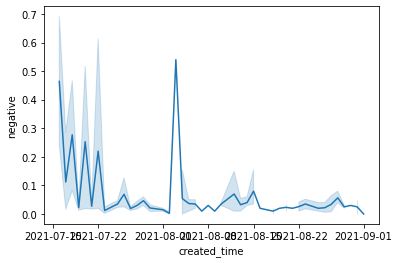

In [33]:
sns.lineplot(data=ndf, x="created_time", y="negative")